In [1]:
import os , sys
sys.path.append(os.path.join(os.getcwd(),'..'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from scripts.sentiment_labeler import assign_sentiment_label
from scripts.pre_processor import preprocess_text
from scripts.article_catagoriser import categorize_article

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv('C:/kifiya ai/stock-market-predictions/src/data/raw_analyst_ratings.csv')

In [5]:
data['headline_length'] = data['headline'].apply(len)
length_stats = data['headline_length'].describe()
print("Headline Length Statistics:\n", length_stats)
# data.head()

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
data['date'] = pd.to_datetime(data['date'],  errors='coerce')
publisher_counts = data['publisher'].value_counts()
print("\nArticles per Publisher:\n", publisher_counts)



Articles per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [7]:
data['day_of_week'] = data['date'].dt.day_name()
daily_counts = data.groupby('day_of_week').size()
print("\nPublication Trends by Day:\n", daily_counts)
data.head()



Publication Trends by Day:
 day_of_week
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
dtype: int64


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday


C:\Users\Home\AppData\Local\Temp\ipykernel_19060\3531297061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')


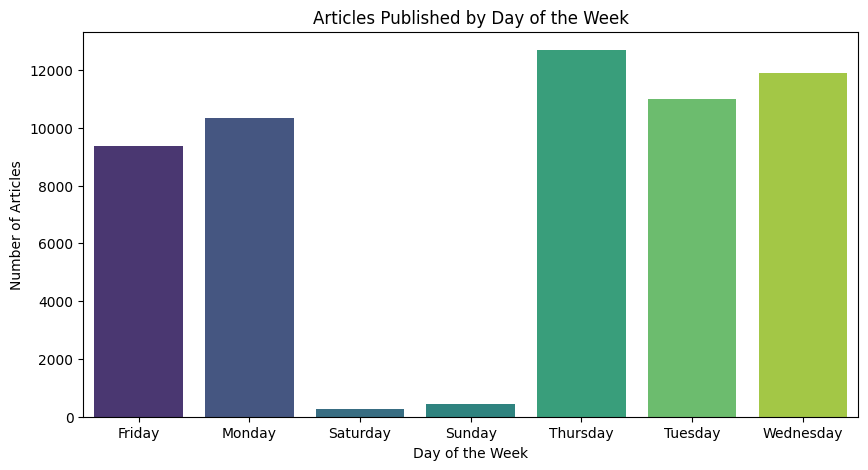

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')
plt.title("Articles Published by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.show()

In [71]:
data['sentiment_label'] = data['headline'].apply(lambda headline: assign_sentiment_label(TextBlob(headline).sentiment.polarity))
data.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_label
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,Neutral


In [8]:
# Apply preprocessing to the headlines
data['cleaned_headline'] = data['headline'].apply(preprocess_text)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,cleaned_headline
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,stocks hit 52week highs friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,stocks hit 52week highs wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,71 biggest movers friday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,46 stocks moving fridays midday session
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,b securities maintains neutral agilent technol...


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=20, ngram_range=(1, 2))  # Extract unigrams and bigrams
tfidf_matrix = tfidf.fit_transform(data['cleaned_headline'])

# Get top keywords
tfidf_keywords = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print("Top Keywords for the Data:")
print(tfidf_keywords.sum().sort_values(ascending=False).head(10))


Top Keywords for the Data:
stocks       146172.842535
shares        79012.831511
earnings      77053.904514
market        67092.115393
update        65819.540080
vs            65464.335866
reports       64188.446586
eps           60882.837161
announces     55602.014408
top           53910.896638
dtype: float64


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_headline'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Display topics
for i, topic in enumerate(lda.components_):
    topic_keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    print(f"Topic {i+1}: {', '.join(topic_keywords)}")


Topic 1: beats, guidance, results, blog, eps, update, earnings, analyst, sales, estimate
Topic 2: yesterday, watch, movers, biggest, premarket, moving, session, 52week, benzingas, stocks
Topic 3: oil, companies, says, update, higher, market, trading, scheduled, earnings, shares
Topic 4: upgrades, neutral, downgrades, announces, price, raises, maintains, target, buy, pt
Topic 5: q2, sees, q4, industry, revenue, sales, reports, eps, est, vs


In [48]:

# Extract time components
data['to_date'] = data['date'].dt.date
data['to_hour'] = data['date'].dt.hour
data['to_day_of_week'] = data['date'].dt.day_name()

# Group by date for daily frequency
daily_publications = data.groupby('date').size()
data.head()


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,day_of_week,sentiment_label,cleaned_headline,to_date,to_hour,to_day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,Friday,Neutral,stocks hit 52week highs friday,2020-06-05,10.0,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,Wednesday,Neutral,stocks hit 52week highs wednesday,2020-06-03,10.0,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,Tuesday,Neutral,71 biggest movers friday,2020-05-26,4.0,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,Friday,Neutral,46 stocks moving fridays midday session,2020-05-22,12.0,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,Friday,Neutral,b securities maintains neutral agilent technol...,2020-05-22,11.0,Friday


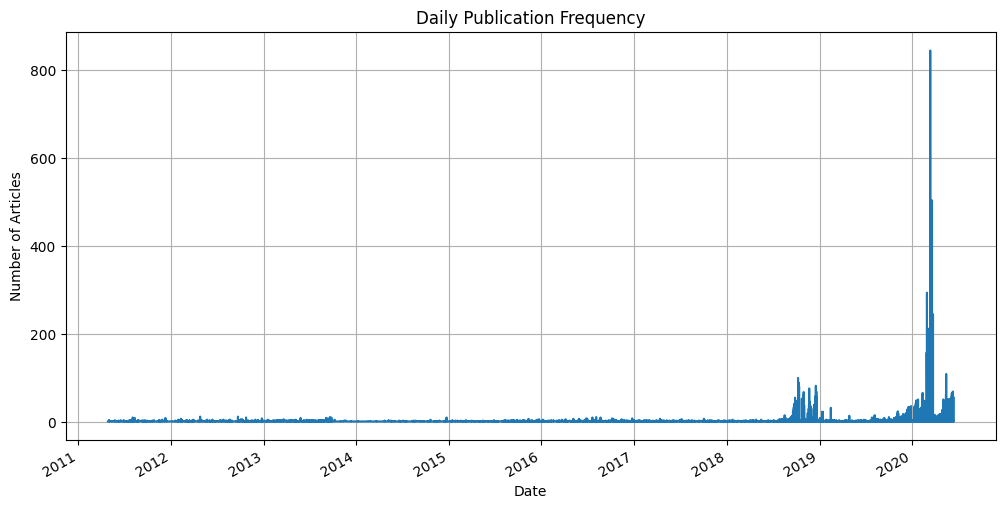

In [49]:
plt.figure(figsize=(12, 6))
daily_publications.plot(kind='line', title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()


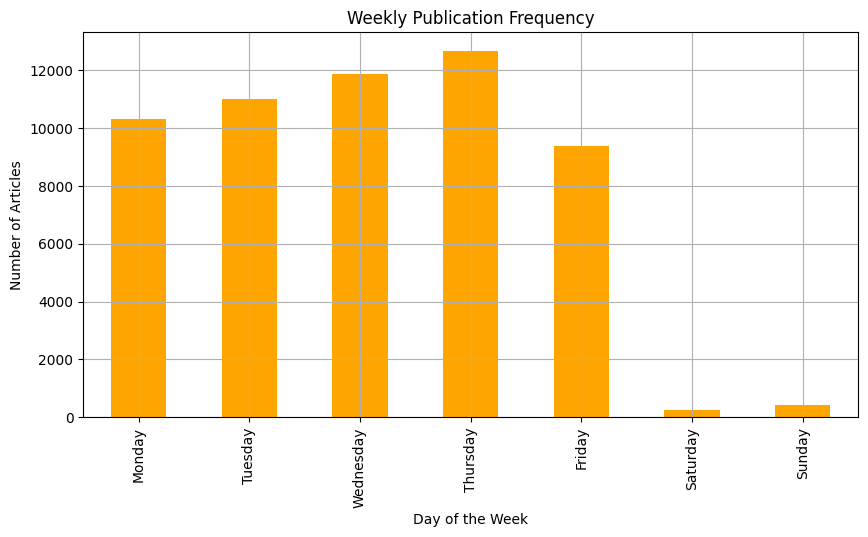

In [50]:
# Group by day of the week
weekly_publications = data.groupby('day_of_week').size()

plt.figure(figsize=(10, 5))
weekly_publications.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(
    kind='bar', color='orange', title='Weekly Publication Frequency'
)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()


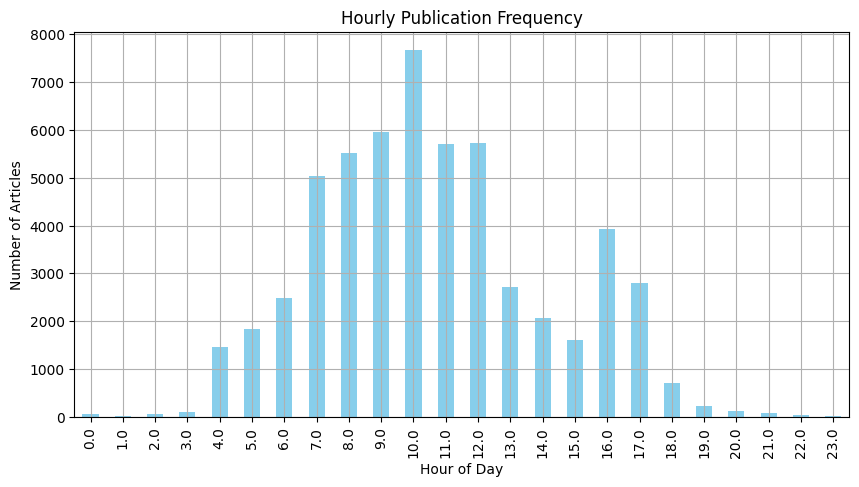

In [51]:
# Group by hour
hourly_publications = data.groupby('to_hour').size()

plt.figure(figsize=(10, 5))
hourly_publications.plot(kind='bar', color='skyblue', title='Hourly Publication Frequency')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(24))
plt.grid()
plt.show()


In [52]:
# Count articles by publisher
top_publishers = data['publisher'].value_counts().head(10)
print(top_publishers)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


C:\Users\Home\AppData\Local\Temp\ipykernel_19060\3137516551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_publisher_data['category'] = top_publisher_data['headline'].apply(categorize_article)


publisher          category             
Benzinga Newsdesk  Financial Performance    36029
                   General Updates          11530
                   Market Trends            62383
                   Other                    40542
Benzinga Staff     Financial Performance     7845
                   General Updates           1671
                   Market Trends             2105
                   Other                    16493
Charles Gross      Financial Performance    15889
                   General Updates           5982
                   Market Trends             9392
                   Other                    65469
ETF Professor      Financial Performance      632
                   General Updates            262
                   Market Trends             2203
                   Other                    25392
Eddie Staley       Financial Performance    19384
                   General Updates           3438
                   Market Trends             3449
         

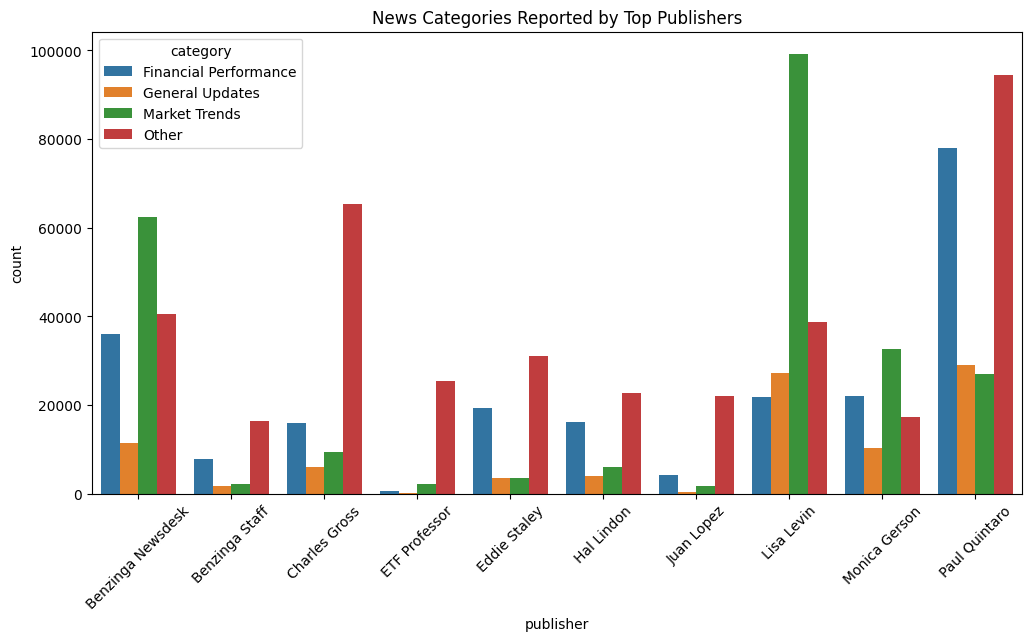

In [65]:
# Get the list of top 10 publishers
top_publisher_list = top_publishers.index

# Filter the data for only the top publishers
top_publisher_data = data[data['publisher'].isin(top_publisher_list)]

# Apply the categorization
top_publisher_data['category'] = top_publisher_data['headline'].apply(categorize_article)

# Group by publisher and category to analyze distribution
publisher_category_distribution = top_publisher_data.groupby(['publisher', 'category']).size()
print(publisher_category_distribution)


# Reset the index for easier plotting
publisher_category_distribution = publisher_category_distribution.reset_index(name='count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=publisher_category_distribution, x='publisher', y='count', hue='category')
plt.title('News Categories Reported by Top Publishers')
plt.xticks(rotation=45)
plt.show()




In [54]:

# Extract domains from email addresses
data['domain'] = data['publisher'].apply(lambda x: re.search(r"@([\w.-]+)", x).group(1) if "@" in x else "Unknown")

# Count domains
domain_counts = data['domain'].value_counts()

print("Top Domains:\n", domain_counts.head(10))


Top Domains:
 domain
Unknown                   1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64
